In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
iris_df = pd.read_csv("iris.csv")

In [3]:
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

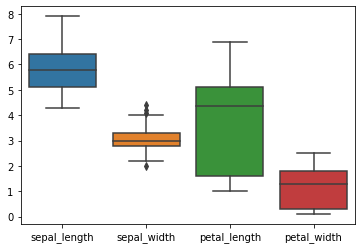

In [9]:
sns.boxplot(data = iris_df)

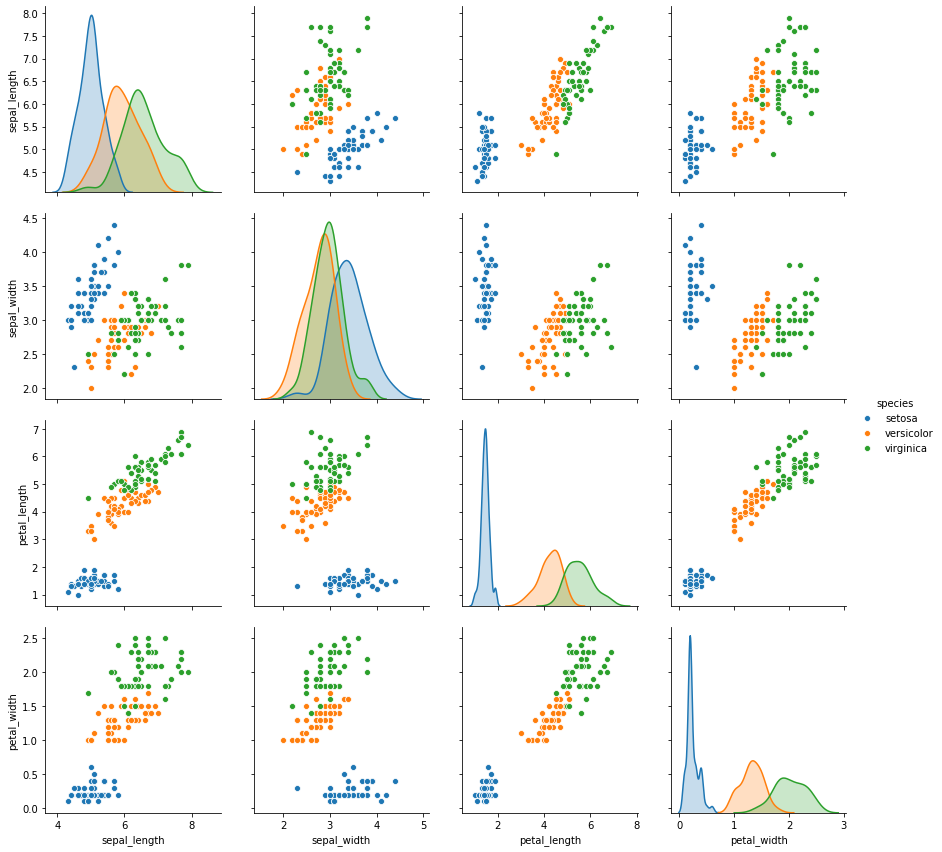

In [17]:
sns.pairplot(iris_df,hue="species", height=3)

## Preparing the data

Independent variable or input variable = Feature variable = x
Dependent variable or output variable = Target variable = y

In [18]:
x = iris_df.drop("species",axis=1)
y = iris_df["species"]

## Split the datset

Split the data into training and test datasets, we'll do this by using Scikit-Learn's built-in train_test_split()
method The model learn the relationships from the training data and predict on the test data. I have split the data in 80:20 ratio

In [19]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [25]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_test.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (120, 4)
Shape of y_train:  (30,)
Shape of x_test:  (30, 4)
Shape of y_test:  (30,)


## Training model

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Predict the model

In [29]:
y_pred = tree_model.predict(x_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']


In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(10)

,Actual,Predicted
114,virginica,virginica
62,versicolor,versicolor
33,setosa,setosa
107,virginica,virginica
7,setosa,setosa
100,virginica,virginica
40,setosa,setosa
86,versicolor,versicolor
76,versicolor,versicolor
71,versicolor,versicolor


## Let us visualize the Decision Tree to understand it better.


Text(0.5, 1.0, 'Decision Tree')

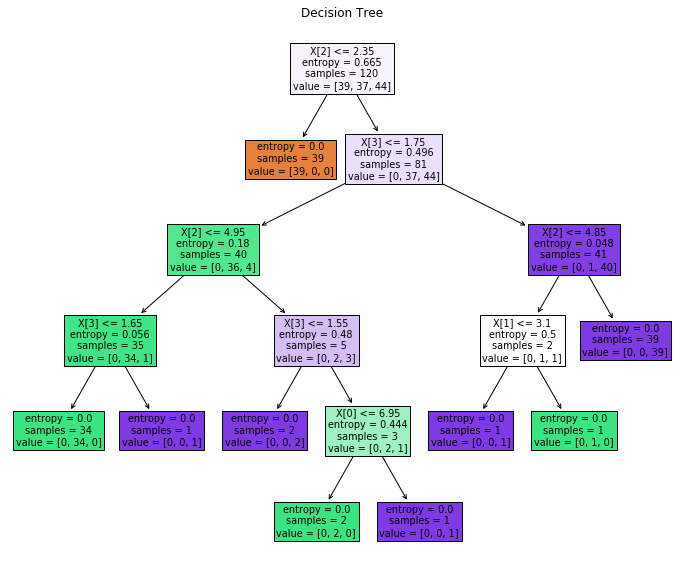

In [37]:
from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(tree_model, filled  =True)
plt.title("Decision Tree")